In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive

# Mount Google Drive7

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import pandas as pd
# Heart disease Loading Data
df = "/content/drive/MyDrive/heart_data.csv"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_data.csv')
print(df.head())

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


In [ ]:
# Show tail of each dataset
print("Tail of df:")
print(df.tail())

Tail of df:
     Unnamed: 0     biking    smoking  heart.disease
493         494  47.660440  27.562464      11.294392
494         495  45.097203  21.385620       9.616762
495         496   8.279743   6.423720      13.495168
496         497  42.345863  20.741328      10.115865
497         498  30.774254  23.610175      11.843556


In [ ]:
# Display the entire contents of each dataset
print("df:")
print(df)

df:
     Unnamed: 0     biking    smoking  heart.disease
0             1  30.801246  10.896608      11.769423
1             2  65.129215   2.219563       2.854081
2             3   1.959665  17.588331      17.177803
3             4  44.800196   2.802559       6.816647
4             5  69.428454  15.974505       4.062224
..          ...        ...        ...            ...
493         494  47.660440  27.562464      11.294392
494         495  45.097203  21.385620       9.616762
495         496   8.279743   6.423720      13.495168
496         497  42.345863  20.741328      10.115865
497         498  30.774254  23.610175      11.843556

[498 rows x 4 columns]


In [ ]:
df = df.drop("Unnamed: 0", axis=1)
#A few plots in Seaborn to understand the data

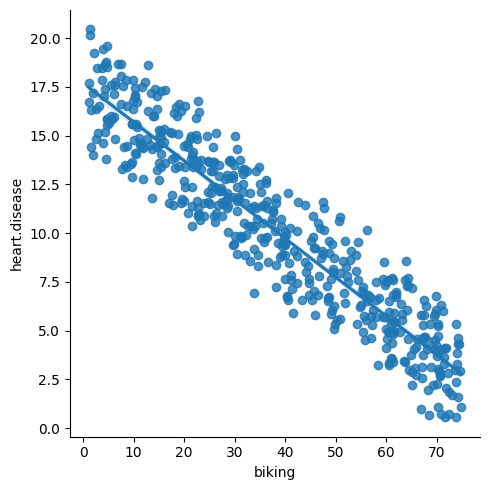

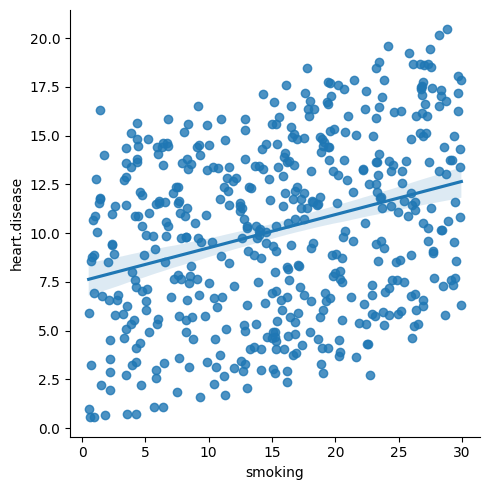

In [ ]:
sns.lmplot(x='biking', y='heart.disease', data=df)
sns.lmplot(x='smoking', y='heart.disease', data=df)

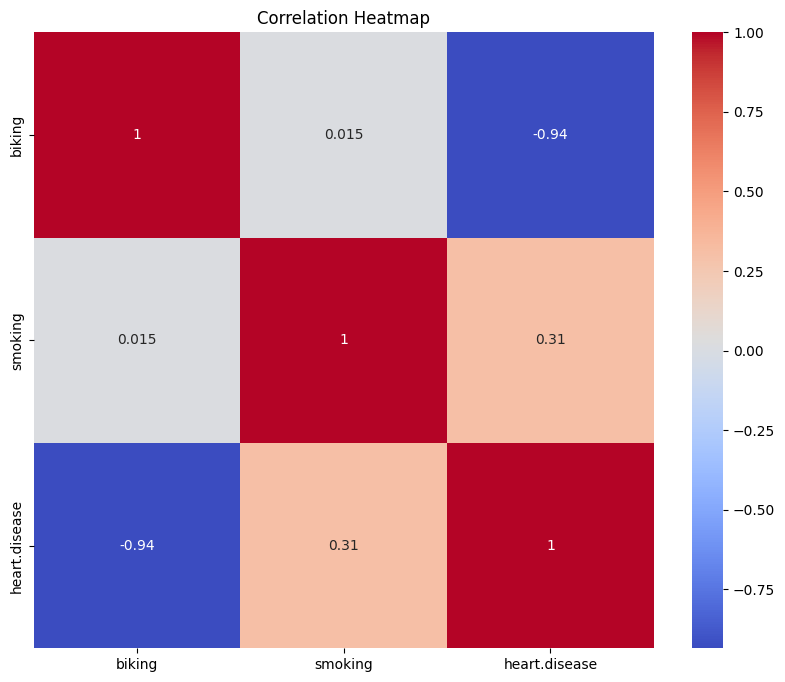

In [ ]:
import matplotlib.pyplot as plt
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['biking', 'smoking', 'heart.disease']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [ ]:
from sklearn import linear_model

#Create Linear Regression object
model = linear_model.LinearRegression()

I will call the fit method to train the model using independent variables.
And check the value that needs to be predicted (Images_Analyzed)


In [ ]:
model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well

0.9811067878031208


#Scatter plot where the x-axis represents the true values and the y-axis represents the predicted values.

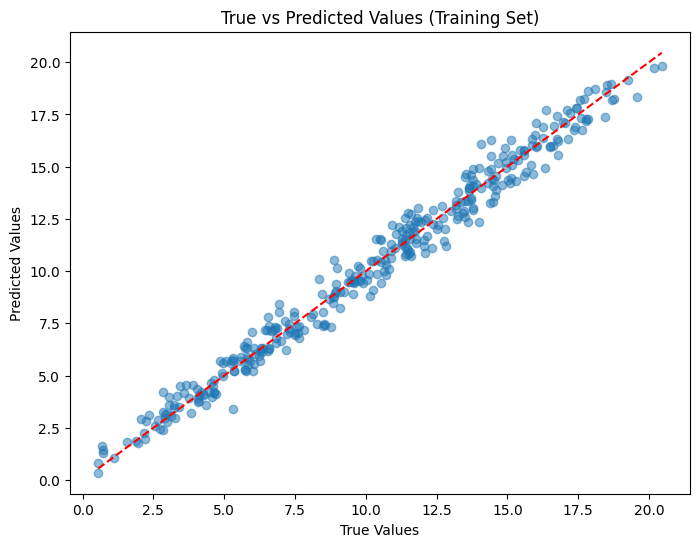

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Getting predictions
y_pred = model.predict(X_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Training Set)')
plt.show()


#Bar plot to compare the true and predicted values visually

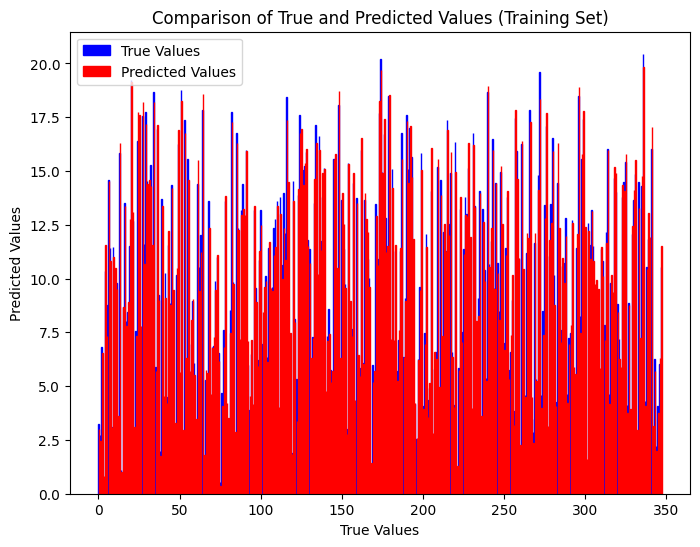

In [ ]:

# Getting predictions
y_pred = model.predict(X_train)

# Calculate residuals (errors)
residuals = y_train - y_pred

# Plotting a bar plot to compare true and predicted values
plt.figure(figsize=(8, 6))
barWidth = 0.35
true_bars = np.arange(len(y_train))
predicted_bars = [x + barWidth for x in true_bars]
plt.bar(true_bars, y_train, color='b', width=barWidth, edgecolor='blue', label='True Values')
plt.bar(predicted_bars, y_pred, color='r', width=barWidth, edgecolor='red', label='Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of True and Predicted Values (Training Set)')
plt.legend()
plt.show()


In [ ]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6.67918277 13.686728

#To visualize the relationship between the predicted values and the true values in the test set, as well as the errors, using a heatmap.

In [ ]:
# Getting predictions for the test set
prediction_test = model.predict(X_test)

# Mean squared error
mse = np.mean((prediction_test - y_test) ** 2)
print("Mean squared error between y_test and predicted =", mse)

Mean squared error between y_test and predicted = 0.4364830992783996


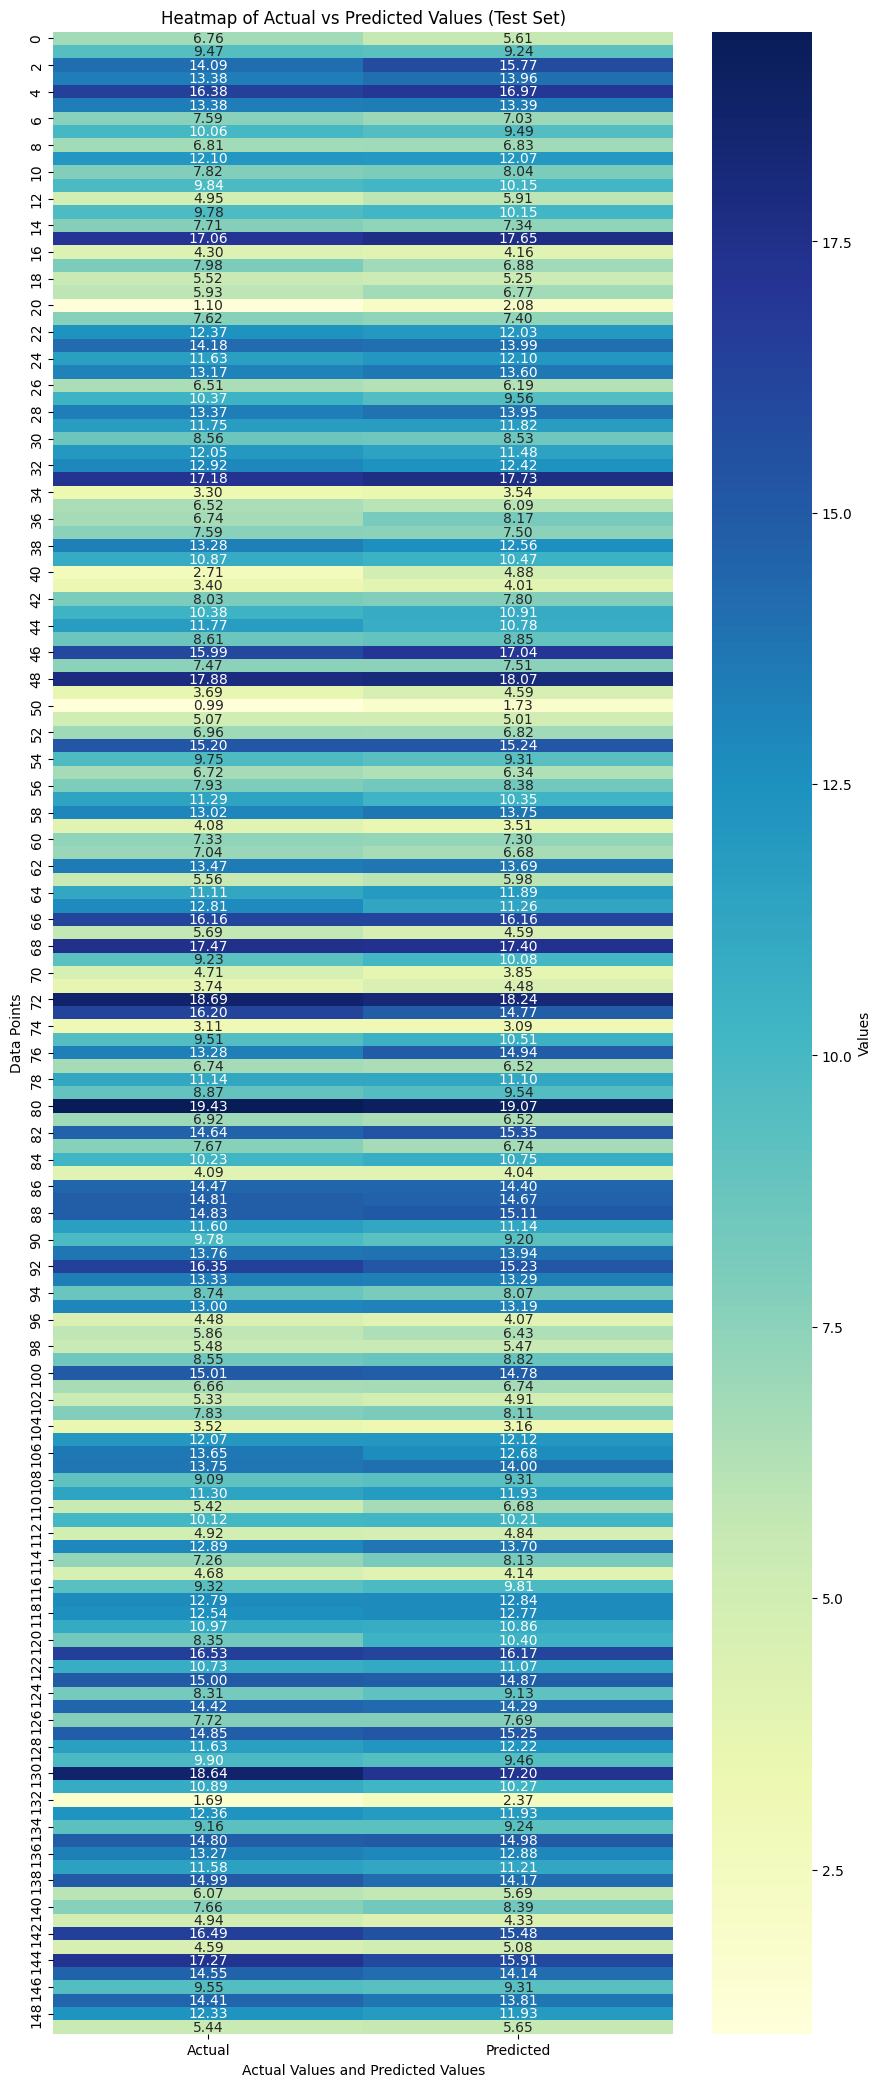

In [ ]:
# Plotting heatmap
plt.figure(figsize=(10, 26))
sns.heatmap(np.array([y_test, prediction_test]).T, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Values'})
plt.xlabel('Actual Values and Predicted Values')
plt.ylabel('Data Points')
plt.title('Heatmap of Actual vs Predicted Values (Test Set)')
plt.xticks(ticks=[0.5, 1.5], labels=['Actual', 'Predicted'])
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[20.1, 56.3]]))

[20.94129617]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#All set to predict the number of images someone would analyze at a given time
#print(model.predict([[13, 2, 23]]))